Generate Arrays

In [2]:
import numpy as np

# Function to generate the dataset with the arrays 
def generate_datasets(limit):
    dataset = []
    sizes = [1000,10000,100000,1000000,10000000] #size of the arrays
    
    for size in sizes:
        dataset.append(np.random.randint(1, limit + 1, size))
    return dataset

limit = 5000  # You can specify the limit here
datasets = generate_datasets(limit)
datasets


[array([3272, 2304, 2373, 3922, 4446, 3041,   97, 1644,  812, 3882, 2622,
         821,  529, 4665, 3773, 1436, 2951, 4072, 2707, 3700, 2171, 4401,
         243, 1725, 2055, 1452, 1254, 4475, 2306, 4908, 2441, 4261, 4025,
        3385, 1877,  191,  267, 3658, 3089, 3754,  392, 1165, 1138, 3261,
         473, 1858,  315, 4631, 2380,  968, 4151,  568, 1772, 2898, 1931,
        3449,  974, 2874, 4217,  556, 1824, 4337, 4888, 1642, 1881,  721,
        1174, 2221,   24, 1085, 4028, 3237, 4778, 3085, 2646,  994, 2912,
         201, 1511, 1322, 2894, 3649, 3844,  995, 3676, 4904, 4029, 4307,
        4446, 1755, 3846, 4646, 4208, 1730,  219, 3715,  721, 4400,  907,
        1090,  125, 2730, 1405, 2924, 3454, 4412, 4266, 3946, 3743, 3842,
        2085, 2593,  337, 4192, 4688, 1084, 1600, 3267, 3192,  687, 3058,
         393, 3208,  848, 2680, 2838,  531, 4316,  282,  662, 2374, 4465,
        4810, 1324, 2952,  258, 3659, 2360, 1097, 3563,   89, 2447, 2141,
         378, 2439, 4957, 3765, 1002, 

Hybrid Sort

In [4]:
def insertion_sort(arr):
    n = len(arr)
    comparison_count = 0
    
    #checking for array size
    if (n>1): 
        for i in range (1,n):
            for j in range (i,0,-1):
                comparison_count+=1
                
                #condition for swapping 
                if(arr[j]<arr[j-1]):
                    
                    #in-place swapping
                    arr[j],arr[j-1] = arr[j-1],arr[j] 
                else:
                    break
  
    # print(arr) - use this to remove the array wrapper
    return arr, comparison_count

def merge(arr, mid):
    global keyComp_merge
    
    i = 0     # First element in left half
    j = mid   # First element in right half
    temp = 0  # Temporary storage for swapping elements
    left = right = 0  # Count for left and right
    while (left < len(arr)//2 and right < len(arr)/2): # Loop until at least one half is sorted
        if (arr[i] < arr[j]):           # If left < right, shift left pointer
            i += 1
            left += 1
        elif (arr[i] > arr[j]):         # If left > right
            temp = arr[j];              # Store right in temp
            arr[i+1:j+1] = arr[i:j]     # Shift array one slot right
            arr[i] = temp               # Load right into first unsorted element / last sorted element
            i += 1
            j += 1
            right += 1
        else:                           # If left == right
            arr[i+1:j+1] = arr[i:j]     # Shift unsorted left array one slot right
            i += 2                      # increment left pointer two times (2 sorted elements)
            j += 1
            left += 1
            right += 1
        keyComp_merge += 1                    # Each iteration of the while loop is 1 Key Comparison
    
    return arr

In [5]:
def hybrid_sort(arr, s): #integer s is the threshold below which mergersort will switch to insertion sort 

    global keyComp_insert

    if(len(arr) <= s):
        sorted_array = insertion_sort(arr)
        arr, comp = sorted_array[0], sorted_array[1]
        keyComp_insert += comp
        return arr

    else:
        mid = len(arr)//2
        arr[ :mid] = hybrid_sort(arr[ :mid],s)
        arr[mid: ] = hybrid_sort(arr[mid: ],s)
        
        arr = merge(arr,mid)
        return arr

In [24]:
#Hybrid sort on different array sizes and fixed threshold s
arraySize_list = list()
keyComp_list1 = list()

s = 10

for dataset in datasets:
    keyComp_merge = 0
    keyComp_insert = 0

    sorted_array_hybrid = hybrid_sort(dataset.copy(), s)
    keyComp_hybrid = keyComp_insert + keyComp_merge

    arraySize_list.append(dataset.size)
    keyComp_list1.append(keyComp_hybrid)

    print(f"Sorted Array: {sorted_array_hybrid} \nArray Size: {dataset.size} \nKey Comparisons: {keyComp_hybrid}")

Sorted Array: [   2    6   21   24   32   50   59   62   68   71   75   81   81   87
   89   97  100  108  108  116  124  125  133  136  137  142  160  160
  161  163  170  174  179  184  188  191  194  196  201  201  202  208
  210  215  219  219  220  225  228  238  241  243  249  251  251  258
  263  267  267  274  280  282  284  289  291  295  298  299  310  312
  314  315  323  324  336  337  337  338  342  355  367  378  384  385
  387  392  393  395  403  407  416  417  429  429  429  437  441  453
  459  473  484  485  498  503  509  520  523  527  528  529  531  549
  553  555  556  558  567  568  568  572  577  585  588  603  603  613
  620  624  629  631  632  639  658  662  687  688  688  689  695  715
  719  721  721  728  731  733  738  743  752  757  777  784  788  791
  798  802  807  810  812  821  824  825  825  830  837  848  857  860
  866  880  881  885  888  891  894  899  900  907  913  925  931  938
  941  942  948  948  953  959  961  962  964  968  974  976  9

In [19]:
#Hybrid sort on fixed array size and different sizes of threshold s

thresholdSize_list = list()
keyComp_list2 = list()

max_s = 100 #maximum size of threshold s

array_s = list() 
for i in range(1,max_s+1): #create list of s values
    array_s.append(i)

for s in array_s:

    keyComp_insert = 0
    keyComp_merge = 0 

    sorted_array_hybrid = hybrid_sort(datasets[1].copy(),s) #hybrid sort array of 10000 numbers
    
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    thresholdSize_list.append(s)
    keyComp_list2.append(keyComp_hybrid)

    print(f"Threshold Size: {s} \nSorted Array: {sorted_array_hybrid} \nKey Comparisons: {keyComp_hybrid}\n")


Threshold Size: 1 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 114300

Threshold Size: 2 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 114300

Threshold Size: 3 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 114281

Threshold Size: 4 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 114335

Threshold Size: 5 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 115422

Threshold Size: 6 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 115422

Threshold Size: 7 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 115422

Threshold Size: 8 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 115422

Threshold Size: 9 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 116376

Threshold Size: 10 
Sorted Array: [   1    1    1 ... 4999 5000 5000] 
Key Comparisons: 120980

Threshold Size: 11 
Sorted Array: [   1    1    1

Analyze Time Complexity

[9080, 120980, 1375938, 15738626, 176940606]
[1000, 10000, 100000, 1000000, 10000000]


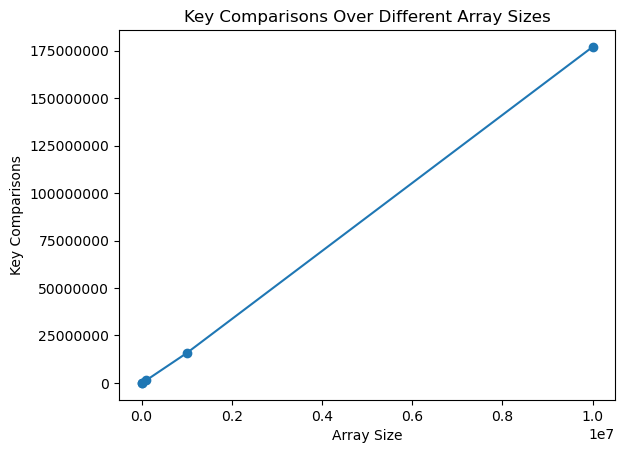

In [51]:
from matplotlib import pyplot as plt 

# With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. 

print(keyComp_list1)  #y-axis
print(arraySize_list) #x-axis

plt.title("Key Comparisons Over Different Array Sizes") 
plt.xlabel("Array Size") 
plt.ylabel("Key Comparisons")
#plt.xscale('log') 

plt.ticklabel_format(axis="y", style="plain")
plt.plot(arraySize_list, keyComp_list1, marker='o') 
#plt.show()

[114300, 114300, 114281, 114335, 115422, 115422, 115422, 115422, 116376, 120980, 120980, 120980, 120980, 120980, 120980, 120980, 120980, 120980, 128023, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 136997, 174337, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 176756, 255574, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604, 266604]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,

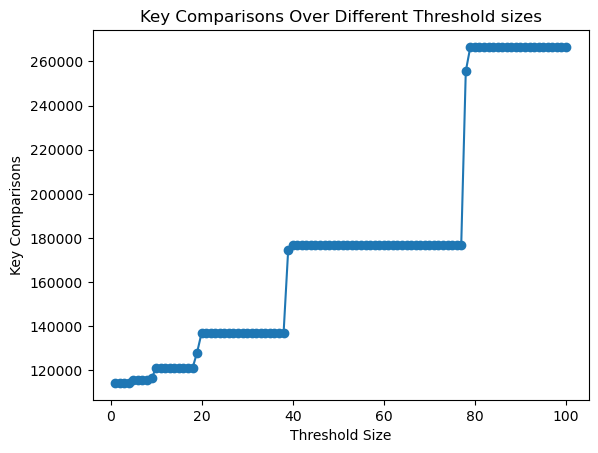

In [39]:
# With the array size fixed, plot the number of key comparisons over different sizes of threshold size s. 

print(keyComp_list2)      #y-axis
print(thresholdSize_list) #x-axis

plt.title("Key Comparisons Over Different Threshold sizes") 
plt.xlabel("Threshold Size") 
plt.ylabel("Key Comparisons") 

plt.plot(thresholdSize_list, keyComp_list2, marker='o') 